Brendan Bruce

ECE 573: HW2

Due Date: 2/26/2019

# Question 1

Implement Shellsort which reverts to insertion sort. (Use the increment sequence 7, 3, 1). Create a table (or preferably, a plot) for the total number of comparisons made in the sorting the data for both cases (insertion sort phase and shell sort phase). Explain why Shellshort is more effective than Insertion sort in this case.

## Problem Background

## Analysis

### data0

I have experimented with running Shell Sort and Insertion Sort on both of the provided datasets: data0 and data1. 

With data0 the elements are already sorted giving us an idea of how the algorithms would perform in the **best case**.

In the graph below I show the results of running the 2 implemented algorithms on the data0 dataset. The left graph is the total number of comparisons used by shell sort, the middle graph is the number of comparisons used in the insertion sort phase only and the right graph is the number of comparisons used by the insertion sort implementation. 

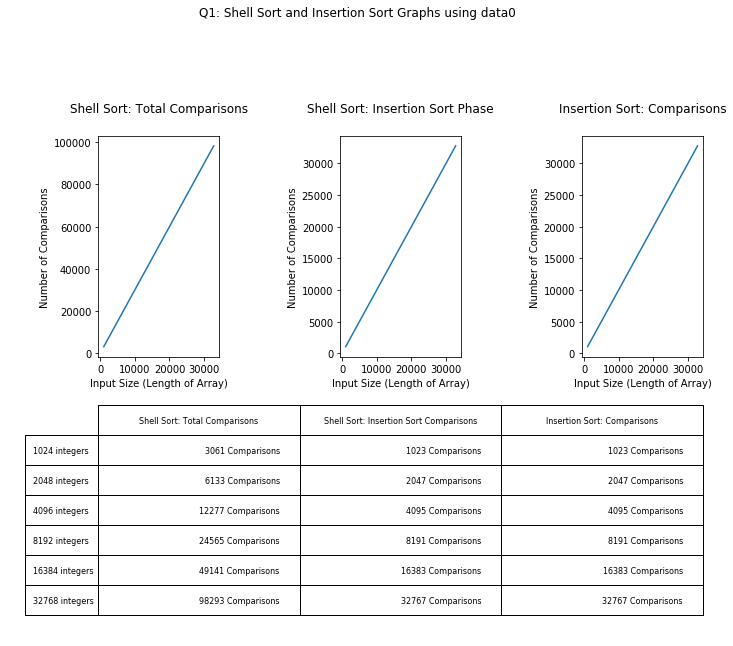

In [2]:
from timing_experiments import *
shellsort_comps(0)

What we see is that, in the best case, insertion sort will perform exactly N-1 comparisons for arrays of length N. Meanwhile, the Shell Sort implementation performs 3N-3 comparisons with the insertion sort phase performing N-1 of those comparisons.

This result makes sense based on what we know about insertion and shell sort:
1. Shell sort consists of multiple phases of g-sorting where the g-sort is implemented with a smaller insertion sort
2. When g-sorting we stride over the array with the smaller insertion sorts so every element gets g-sorted
3. With 3 phases of this we end up with 3 times the number of comparisons used in a single insertion sort in the best case

### data1

Now we look at the results from the data1 dataset. Here the values are unordered/shuffled. These results will give us an idea of the **average case** results and also a numerical example of why shell sorting improves upon regular insertion sorting.

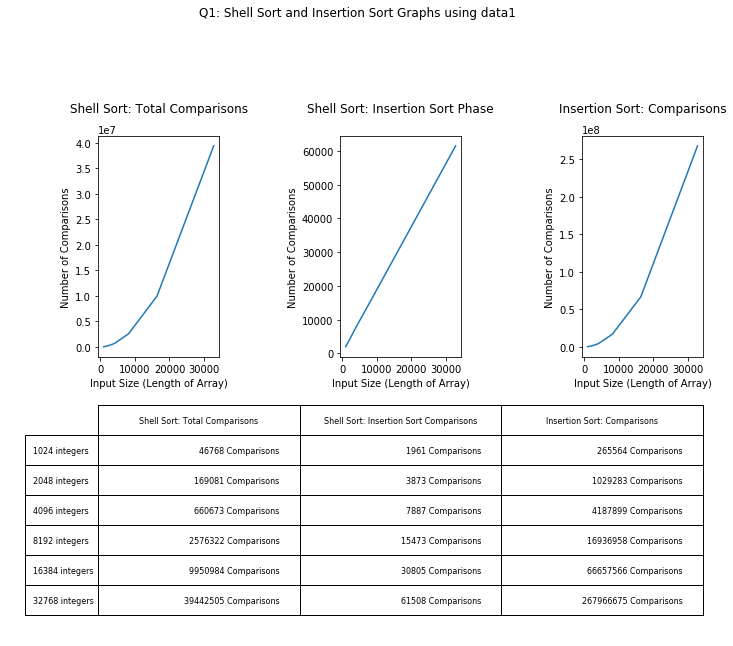

In [3]:
shellsort_comps(1)

From the results above we see that in total, shell sort will use an order of magnitude less comparisons than insertion sort (in the 32k case we have ~40 million comparisons vs ~200 million comparisons)

In addition, we can see that effects of the 7 and 3 sorting phases have on the insertion sort phase: By first 7-sorting and 3-sorting, the insertion sort phase becomes a linear complexity operation!

## Why is shell sort more effective than insertion sort in this case?

Shell sort uses a gap comparing elements far apart and then shortens the gap until reaching the case of a gap of 0 which becomes regular insertion sorting.

Shell sort therefore becomes more effective than insertion sort in cases where the array is not already sorted. It does this by reducing the number of inversion pairs after each subsorting iteration. 

### Why does this improve anything?

1. Insertion sort is on average O(n^2) which is very slow for large arrays
    1. The subsorts use insertion sort so they are also very slow for large arrays
        1. However, with the gap the size of the subarrays are not large! By using a lot of smaller insertion sorts we can reduce the number of inversion pairs efficiently!
        2. k*(N/k)^2 < N^2  for all N
            1. k is the gap size, ~k*(N/k)^2 being the cost of k sorting an array 
        
        
2. Insertion sort takes longer based on the number of inversion pairs
   1. The less inversion pairs the closer to best case performance
       1. Best case performance can be seen from data1 plots where there are 0 inversion pairs
    
### In conclusion

Shell sort is more effective than insertion sort in cases where the array is randomly shuffled because the subsorting phases allow us to reduce the number of inversion pairs through avoiding performing O(N^2) operations on large N arrays.

# Question 2
The Kendall Tau distance is a variant of the "number of inversions" we discussed in class. It is defined as the number of pairs that are in different order in two permutations. Write an efficient program that computes the Kendall Tau distance in less than quadratic time on average. Plot your results and discuss. Use the dataset provided here. 

Note: data0.* for convenience is an ordered set of numbers (in powers of two). data1.* are shuffled data sets of sizes (as given by "*").


## Problem Background

## Analysis

We are going to compare the two implementations I considered and analyze their outputs and their runtimes on the two provided datasets.

### Output analysis: data0

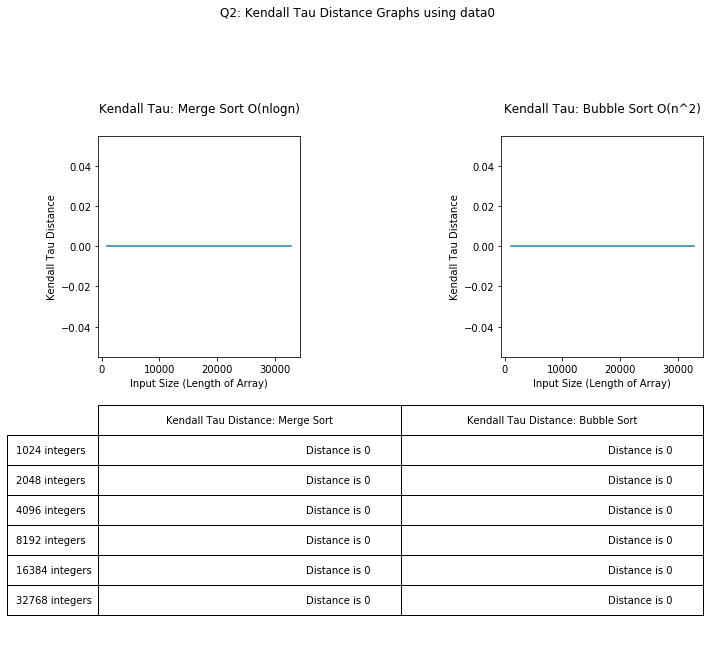

In [4]:
kendalltau_outputs(0)

Unsurprisingly, the Kendall Tau distance for sorted data is 0. This graph is essentially here as a sanity check.

### Output analysis: data1

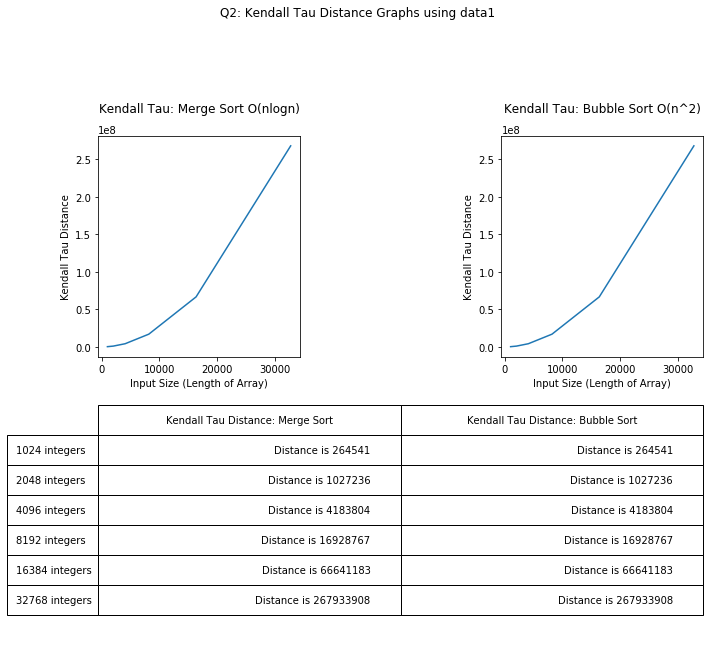

In [5]:
kendalltau_outputs(1)

In [6]:
import math
# Doubling hypothesis/Power law
run_time = [1027236, 4183804, 16928767, 66641183, 267933908]
for prev, curr in zip(run_time[:-1:], run_time[1::]):
    print(math.log(curr/prev, 2))

2.02604759834439
2.0165897270555218
1.9769371124024886
2.0073912545253996


This is the more interesting graph, showing us the Kendall Tau distance for data that is unordered/shuffled. 

1. We see that both implementations provide the same distances which is nice because that is what was intended
2. We see that the distance grows quadratically for unordered data this is significant because:
    1. It shows that the data provided is shuffled, meaning our **average case** claims in the other sections are valid
    2. It makes intuitive sense with Kendall Tau being "the number of swaps used in bubble sorting" that the number of swaps would grow at the same rate average case bubble sort grows O(n^2)

### Timing analysis: data0

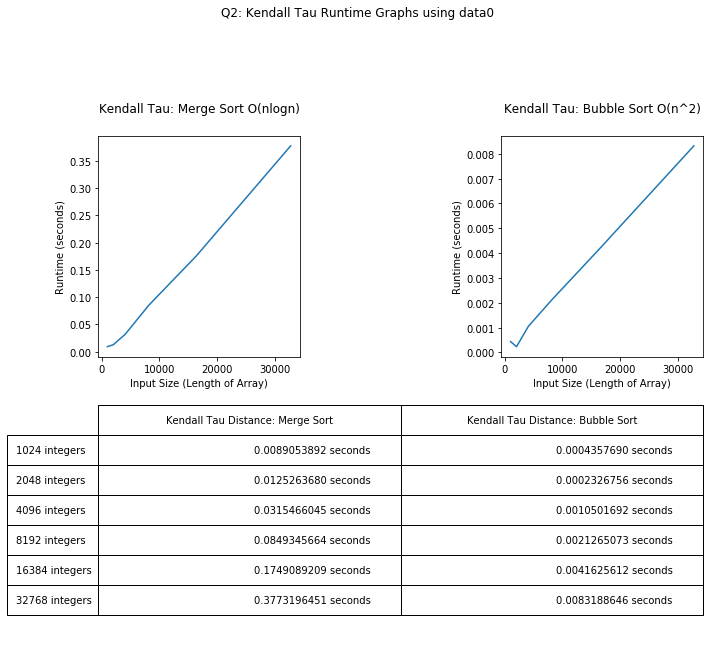

In [6]:
kendalltau_timing(0)

I discuss my bubblesort implementation later but it is necessary to know that the implementation is a modified bubblesort where if there an outer loop iteration where no swaps are made, then the sort is considered complete.

This is necessary information because it makes explaining the above results easier: This is Kendall Tau on sorted data which will give us an idea of the **best case** performance.

In the best case, Merge Sort still operates as an O(nlogn) operation because it does not consider the values of the array outside of merging.

In the best case, the modified Bubble Sort will take a single iteration to complete.

Therefore, it is not a surprise when the Bubble Sort version completes faster on data0. 

### Timing analysis: data1

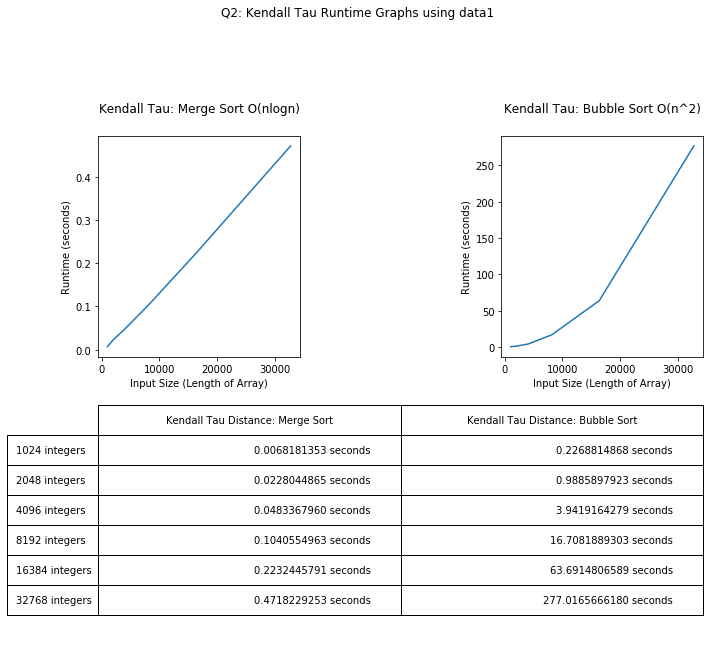

In [7]:
kendalltau_timing(1)

Here we see the power of avoiding computing Kendall Tau in quadratic time!

The merge sort implementation handles size >8000 without much issue meanwhile, the bubble sort implementation begins taking enough time to be an issue.

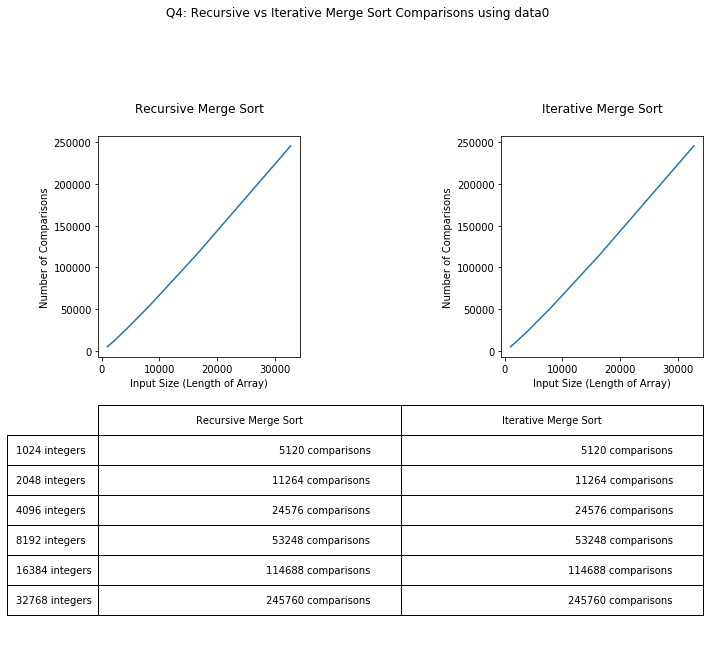

In [8]:
mergesort_vs_mergesort(0)

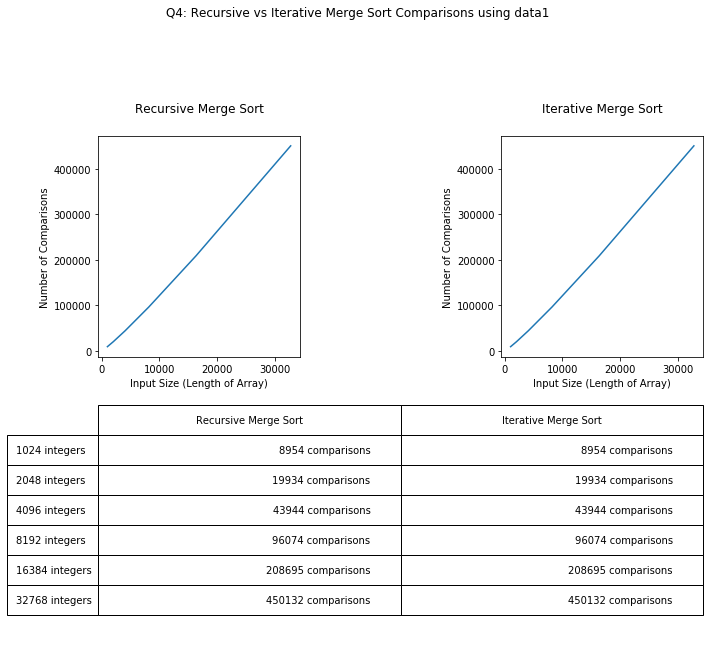

In [9]:
mergesort_vs_mergesort(1)

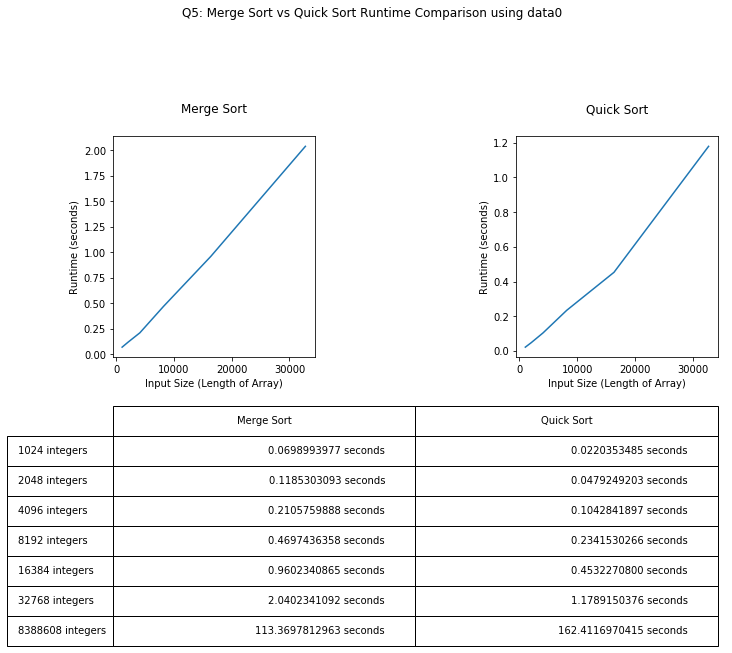

In [10]:
quicksort_vs_mergesort(0)

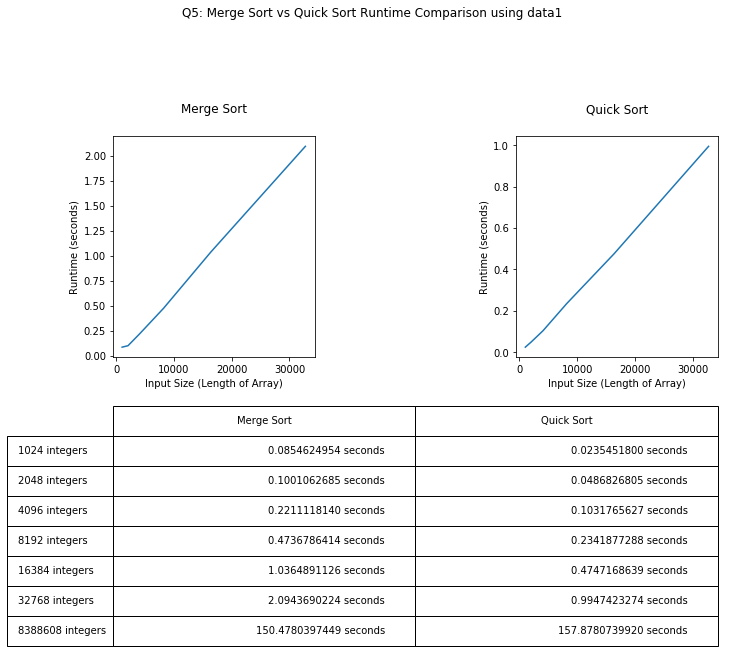

In [11]:
quicksort_vs_mergesort(1)

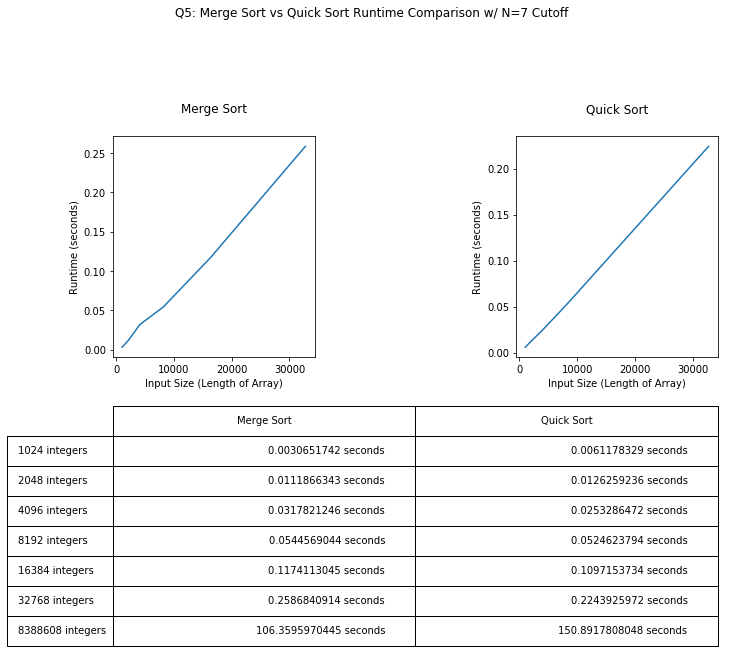

In [12]:
quicksort_vs_mergesort_cutoffs(0)

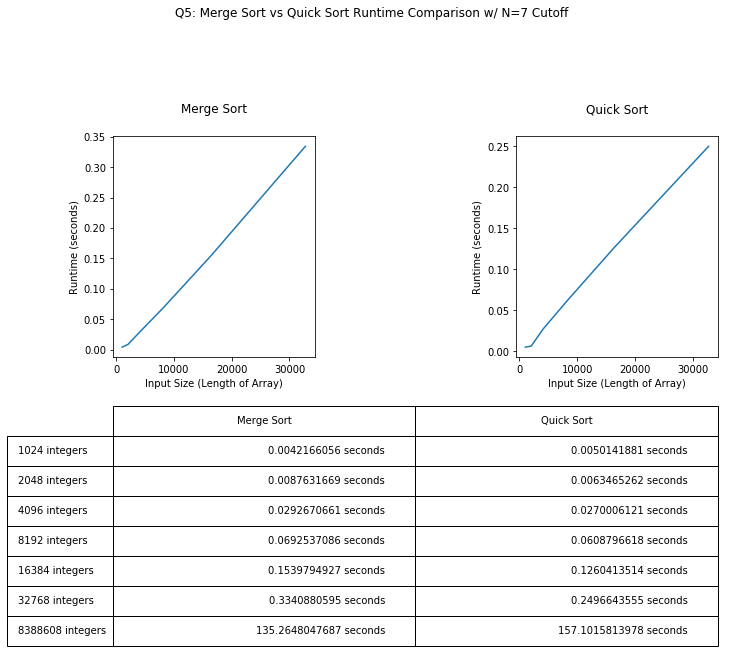

In [13]:
quicksort_vs_mergesort_cutoffs(1)

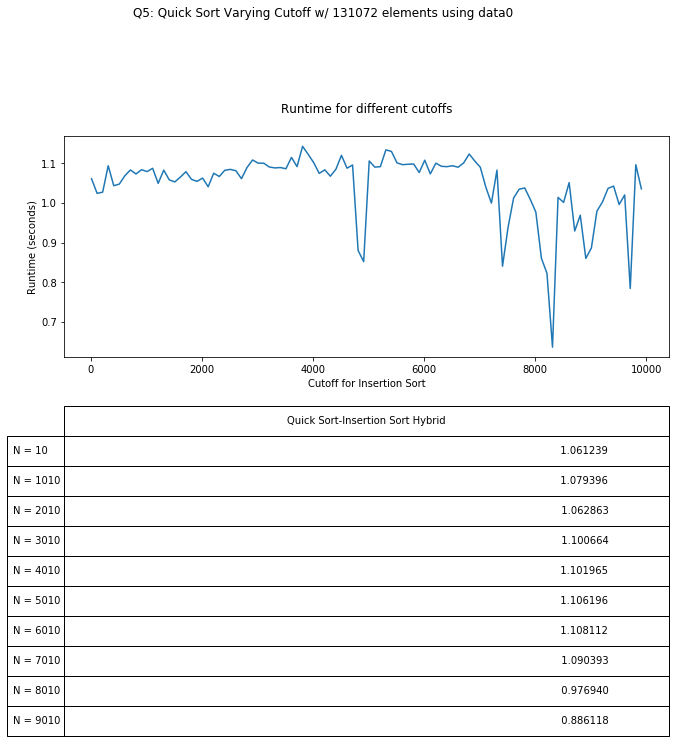

In [2]:
quicksort_varying_cutoffs(0)

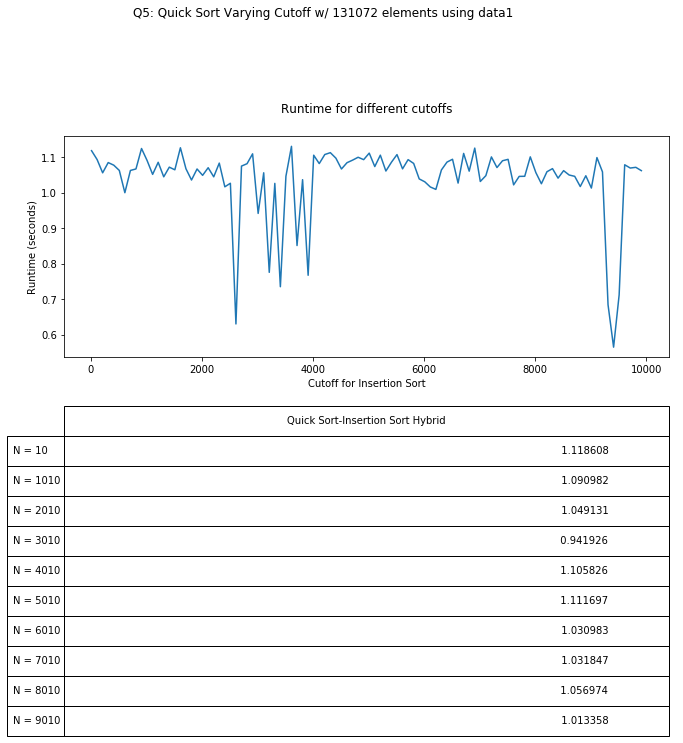

In [3]:
quicksort_varying_cutoffs(1)